# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def get_kernelized_ls_ds(N=25, s=.2, lim=(-5, 5)):
    np.random.seed(98)
    f = lambda x: np.sin(0.9*x).flatten()
    X = np.random.uniform(lim[0], lim[1], size=N)
    y = f(X) + s*np.random.randn(N)
    return (X,y,f)

def get_dna_sequences():
    X_train = ["TCCGTTACCGTGTAACCGACGCCAAGACCGAG", "GCTTGTAATCTGTTTTGACGCCCTCGTCCATGATG", "AGTCAAGCTTTGGTTATTTGTGGTGTTCAATA",\
         "ACCTGAATCTAGTAACCGACGGCGTGTACGATA", "CTTAAAACCTGTTATTAATGCGGTAAAAT", "CCTGCATGCGTGGAAGTGACGCCTATCCAT",\
         "TGTTATACCTTTGGATCATTATTGAGTGAAA", "CTTCAACGCCTATTATTTTGGGTGTGAAAT", "ACCGTAAGTGTTACAGACCGTAAGTACCGTTG",\
         "CGTTCAACGCCTAGGTGTATTGGGTGTCTG"]
    y_train = [1, 1, -1, 1, -1, 1, -1, -1, 1, -1]

    X_test = ["CTTTCAAGGCCCTAATTATCATTGGGTTGAAT", "CGTACCACCCTTCGTTGATGTTTCCGGGAAT", "TCGTACTGCGAACTGAGCCTAGTGACCGACG"]
    y_test = [-1, 1, 1]

    return (X_train, y_train, X_test, y_test)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Kernel Methods

## Kernelized Least Squares
In this task, we will implement a least squares which utilizes kernels. We will use the *dual representation* to make predictions.
Use the following data:

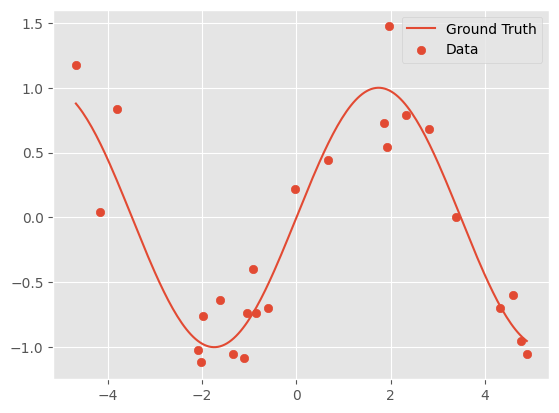

In [2]:
X, y, f = get_kernelized_ls_ds()

axis = np.linspace(min(X), max(X), 201)
plt.plot(axis, f(axis), label='Ground Truth')
plt.scatter(X, y, label='Data')
plt.legend()
plt.show()

> Implement the Gaussian kernel (also called radial basis function kernel):
> $$k\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\exp \left(-\left\|\mathbf{x}-\mathbf{x}^{\prime}\right\|^{2} / 2 \sigma^{2}\right)$$

In [4]:
class GaussianKernel:
    def __init__(self, h):
        self.h = h

    def __call__(self, u, v):
        u = np.array(u)
        v = np.array(v)
        return np.exp(-np.linalg.norm(u-v)**2/(2*self.h**2))

kernel = GaussianKernel(h=1)
kernel([1, 2], [2, 1]) # returns 0.36787944117144233

0.3678794411714422

> Implement the following methods for the class `KernelizedRegression`:
> - `init`: Init the Regression model and set the kernel function.
> - `fit`: Calculate the gram martix $\mathbf{K}$ and $\mathbf{a}$ according to $$K_{n m}=k\left(\mathbf{x}_{n}, \mathbf{x}_{m}\right) \quad \quad \mathbf{a}=\left(\mathbf{K}+\lambda \mathbf{I}_{N}\right)^{-1} \mathbf{t}$$
> - `predict`: Exploit $\mathbf{a}$ to make predictions according to $$y(\mathbf{x}) = \mathbf{k}(\mathbf{x})^{\mathrm{T}} \underbrace{\left(\mathbf{K}+\lambda \mathbf{I}_{N}\right)^{-1} \mathbf{t}}_{\mathbf{a}}$$

In [11]:
class KernelizedRegression:
    def __init__(self, kernel_func):
        self.kernel = kernel_func

    def fit(self, X, y, lmb=0):
        X = np.array(X)
        y = np.array(y)
        self.K = np.array([[self.kernel(u, v) for v in X] for u in X])
        self.a = np.linalg.solve(self.K + lmb*np.eye(len(X)), y)

    def predict(self, x):
        k_x = np.array([self.kernel(v, x) for v in X])
        return np.dot(self.a, k_x)

>Use the implemented model to make predictions for our regression task defined above. Try different values for $\lambda$.

In [12]:
clf = KernelizedRegression(GaussianKernel(h=1))
clf.fit(X, y, lmb=1)
clf.predict(0.5)

0.2712794562917236

> Find the best parameters for $\lambda$ and the bandwidth parameter of the gaussian kernel by using grid search and cross validation. For that, use  `KFold` from `sklearn.model_selection` and plot the *best* model.

In [ ]:
####################
# Your Code Here   #
####################

##  Diferent Kernels

### Example DNA

Consider the following training data which resembles DNA sequences and coressponding labels.
The sequences are $x \in \{A, C, G, T \}*$ while the labels are either $1$ or $-1$.

In [ ]:
X_train, y_train, X_test, y_test = get_dna_sequences()
X_train, y_train

> Implement a kernel function `dna_kernel(u, v)` that is defined as the number of different sub sequences of length 3 between both samples `u` and `v` (i.e., the number of 3 character substrings which are unique in each sequence).
___

#### Example: `ABCDEF` and `CDEFGH`
1. Check if `ABC` in `CDEFGH` -- `ABC` is not in `CDEFGH`
2. Check if `BCD` in `CDEFGH` -- `BCD` is not in `CDEFGH`
3. Check if `CDE` in `CDEFGH` -- `CDE` is in `CDEFGH`
4. Check if `DEF` in `CDEFGH` -- `DEF` is in `CDEFGH`

Since the substrings `CDE` and `DEF` appear in `CDEFGH`: `dna_kernel(ABCDEF, CDEFGH) = 2`.
___

In [ ]:
####################
# Your Code Here   #
####################
dna_kernel("ABCDEF", "CDEFGH") # returns 2

> Fit the kernelized regression model using this new kernel function. Use `plt.matshow` to visualize the gram matrix $\mathbf{K}$. How can you interpret the resulting plot?

In [ ]:
####################
# Your Code Here   #
####################

> In order to make predictions in this classification task, we need to alter the predicted output. For that, use the `np.sign` function and evalutae your model using the `log_loss` from `sklearn.metrics`.

In [ ]:
####################
# Your Code Here   #
####################